Copyright 2020 Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.


# Data cleaning, transformations, & versioning

Most of the datasets we've worked with to this point were error-free and didn't require much, if any alterations before use.
However, real world data frequently needs some "correction" before use.
In this session, we will review some of the techniques we've already used and add some more techniques to our toolkit.

### What you will learn

In this notebook you will learn about methods to prepare real-world data for analysis. We will study the following:

- Missing data
- Outliers
- Standardizing data
- Creating new variables
- Versioning

### When to clean data

Data should always be prepared for analysis.
However, it's important to evaluate a dataset with respect to its unique properties as well the intended analyses before deciding on a strategy for cleaning or transformation. 
Some types of analysis will require the data to have specific properties (i.e. model assumptions) and may give erroneous results otherwise (i.e. violations of model assumptions).


## Missing data

Missing data occurs when, for whatever reason, the variable wasn't measured for a datapoint.
Ideally this is represented in the data using `na` or `nan`.
However, there is no universal convention for representing missing data.
You will find datasets that use blanks, `?`, or even `0` to represent a missing value.
`pandas` will recognize the following by default as `nan` when reading a CSV file: `-1.#IND`, `1.#QNAN`, `1.#IND`, `-1.#QNAN`, `#N/A N/A`, `#N/A`, `N/A`, `n/a`, `NA`, `<NA>`, `#NA`, `NULL`, `null`, `NaN`, `-NaN`, `nan`, `-nan`, and ` `.
Any other value for a missing value will not be recognized as such, *unless* you specifically tell `pandas` what to do.
Let's look at an example, starting by importing `pandas`:

- `import pandas as pd`

In [4]:
import pandas as pd

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Nzt=g[pEt(%l}kD/){CM">pd</variable></variables><block type="importAs" id="Q%nZ$%KG#|1A:4A9|%=4" x="16" y="10"><field name="libraryName">pandas</field><field name="VAR" id="Nzt=g[pEt(%l}kD/){CM">pd</field></block></xml>

Our example is a CSV file with `?`, so let's read the file into a dataframe:

- with `pd` do `read_csv` using 
    - `"datasets/na1.csv"`

In [6]:
pd.read_csv('datasets/na1.csv')

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Nzt=g[pEt(%l}kD/){CM">pd</variable></variables><block type="varDoMethod" id="IduV!unUxquz$R)OF$8Q" x="7" y="176"><mutation items="1"></mutation><field name="VAR" id="Nzt=g[pEt(%l}kD/){CM">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="ADD0"><block type="text" id="UV-{,|(UTl=c/MWb]u5W"><field name="TEXT">datasets/na1.csv</field></block></value></block></xml>

,x1,x2
0,1,2
1,?,3
2,3,2
3,5,?


Because `?` is not one of the default `NaN` symbols, it is treated as regular text.
Now try again, but telling `pandas` that `?` is `NaN`:

- Set `dataframe` to with `pd` do `read_csv` using
    - `"datasets/na1.csv"`
    - freestyle `na_values=["?"]`
- `dataframe` (to display)

In [8]:
dataframe = pd.read_csv('datasets/na1.csv',na_values=["?"])

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable><variable id="Nzt=g[pEt(%l}kD/){CM">pd</variable></variables><block type="variables_set" id="b?N6-i,)knP9k=Cx-aQo" x="74" y="218"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><value name="VALUE"><block type="varDoMethod" id="IduV!unUxquz$R)OF$8Q"><mutation items="2"></mutation><field name="VAR" id="Nzt=g[pEt(%l}kD/){CM">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="ADD0"><block type="text" id="UV-{,|(UTl=c/MWb]u5W"><field name="TEXT">datasets/na1.csv</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="DFyp`q!g^B9HUlhF8x%;"><field name="CODE">na_values=["?"]</field></block></value></block></value></block><block type="variables_get" id="Db(XgspuHOj8$BWD85L}" x="52" y="297"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field></block></xml>

,x1,x2
0,1.0,2.0
1,NaN,3.0
2,3.0,2.0
3,5.0,NaN


`pandas` is smart but it can't do all the thinking for you.
It's up to you to figure out what, if any, identifiers have been used in the data to indicate `NaN`, in order to specify them this way to `pandas`.

Given that the data has some missing values, we need to decide what to do with them.
Many algorithms will balk on missing values, so we either need to drop datapoints with missing values or find a way to replace the missing values with a real value.

The first method, dropping the missing values, is something we've seen before:

- with `dataframe` do `dropna`

In [10]:
dataframe.dropna()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable></variables><block type="varDoMethod" id="EgTd:Xz]e0WGIKLVW6Su" x="-2" y="188"><mutation items="1"></mutation><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><field name="MEMBER">dropna</field><data>dataframe:dropna</data></block></xml>

,x1,x2
0,1.0,2.0
2,3.0,2.0


Sometimes we don't want to loose that data; we might be afraid that throwing out data like that biases the model.
An alternative is to replace the missing data with another convenient value.
Many values are possible, but common values are the mean and the median.
Here's an example using the median:

- with `dataframe` do `fillna` using
    - with `dataframe` do `median`

In [12]:
dataframe.fillna(dataframe.median())

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable></variables><block type="varDoMethod" id="ncf=FOqT;~d{#PF+2q@n" x="20" y="225"><mutation items="1"></mutation><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><field name="MEMBER">fillna</field><data>dataframe:fillna</data><value name="ADD0"><block type="varDoMethod" id="IEaQq;XN:/]Of08;FuWk"><mutation items="1"></mutation><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><field name="MEMBER">median</field><data>dataframe:median</data></block></value></block></xml>

,x1,x2
0,1.0,2.0
1,3.0,3.0
2,3.0,2.0
3,5.0,2.0


The median value of `x1` is `3.0`, and the median value of `x2` is `2.0`, so you can see that `NaN` has been replace by the median value *in each column*, i.e. for each variable.

It's important to note that there are [many other ways](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#filling-missing-values-fillna) of removing or replacing missing values. 

The best way to decide what to do with missing data is to understand why the data is missing in the first place.
If there is a pattern to the missing data, then that fact has implications for your model.
We will discuss this idea in the context of outliers next.

## Transforming data

There are three common reasons to transform data:

- Outliers
- Common scale
- Non-normality

### Outliers

Outliers can exert undue influence on some models, like linear regression, when the models try to minimize mean squared error.
In general, the best way to deal with outliers is to try to understand the process that generated the outlier.
For example, perhaps the outlier is a measurement error, in which case throwing that data out or transforming it would make sense.
Alternatively, it could be that the outlier is revealing real and important differences in the data that shouldn't be ignored.
One way to tell if outliers are "real" is to see if there are patterns in the outliers, e.g. in their relationships with other variables.

Assuming you've decided to drop the outliers, there are many ways try to determine what is an outlier and what isn't.
One way is to use *standard deviation*, a measure of the spread of a variable's values about its mean.
In normal distributions, 99.7% of the values are within three standard deviations, so three standard deviations is often used as a criteria for determining outliers.
The problem with this method is that mean and standard deviation are distorted by outliers, so using a criteria based on them means the criteria itself is distorted.

We've already seen an alternative approach illustrated in boxplots.
Recall in boxplots that outliers are drawn as circles outside the whiskers of the plot.
Those whiskers are drawn at 1.5 times the interquartile range (IQR), or the difference between the 25th and 75th percentiles.
In normal distributions (without outliers), this method is almost identical to using three standard deviations, and when there are outliers, this method is unaffected because it is not based on the mean or standard deviation.

Finally, we can construct a simple version of both of these by just using percentiles, e.g. call everything below the 1st percentile or above the 99th percentile an outlier.
Let's try that now, but with a new dataset:

- Set `dataframe` to with `pd` do `read_csv` using
    - `"datasets/outlier1.csv"`
- `dataframe`

In [14]:
dataframe = pd.read_csv('datasets/outlier1.csv')

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable><variable id="Nzt=g[pEt(%l}kD/){CM">pd</variable></variables><block type="variables_set" id="b?N6-i,)knP9k=Cx-aQo" x="74" y="218"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><value name="VALUE"><block type="varDoMethod" id="IduV!unUxquz$R)OF$8Q"><mutation items="1"></mutation><field name="VAR" id="Nzt=g[pEt(%l}kD/){CM">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="ADD0"><block type="text" id="UV-{,|(UTl=c/MWb]u5W"><field name="TEXT">datasets/outlier1.csv</field></block></value></block></value></block><block type="variables_get" id="Db(XgspuHOj8$BWD85L}" x="52" y="297"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field></block></xml>

,x1,x2
0,0.20,0.10
1,1.02,1.92
2,1.03,2.00
3,1.04,1.06
4,1.16,1.53
5,1.30,1.66
6,1.33,1.53
7,1.34,1.30
8,1.37,1.75
9,1.38,1.50


Let's start with the 1st percentile.
Here are the steps:

- Determine the first percentile's value (like `median`, for each column/variable)
- Determine if a given value is above that value
- Return a dataframe with `NaN` wherever it is not above the first percentile

Here are the first two steps:

- `dataframe` followed by `>` followed by with `dataframe` do `quantile` using `.01`

In [16]:
dataframe > dataframe.quantile(0.01)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable></variables><block type="logic_compare" id="@a=%pHkmqTI0V|367Ka-" x="24" y="322"><field name="OP">GT</field><value name="A"><block type="variables_get" id="iE@PIY):dC]gr?$m]]fR"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field></block></value><value name="B"><block type="varDoMethod" id="N4bLloV766%L9?_-TEHf"><mutation items="1"></mutation><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><field name="MEMBER">quantile</field><data>dataframe:quantile</data><value name="ADD0"><block type="math_number" id="~A=rnIC3lc_(NN+[Vjt]"><field name="NUM">0.01</field></block></value></block></value></block></xml>

,x1,x2
0,False,False
1,True,True
2,True,True
3,True,True
4,True,True
5,True,True
6,True,True
7,True,True
8,True,True
9,True,True


Because `>` is logical, the result is True or False for each value.
We can accomplish the third step above by putting these blocks inside `dataframe[ ]`:

- `dataframe[ ]` containing
     - `dataframe` followed by `>` followed by with `dataframe` do `quantile` using .01

In [18]:
dataframe[(dataframe > dataframe.quantile(0.01))]

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable></variables><block type="indexer" id="p!~MCHh9W4;w^SK#?oHl" x="59" y="457"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><value name="INDEX"><block type="logic_compare" id="@a=%pHkmqTI0V|367Ka-"><field name="OP">GT</field><value name="A"><block type="variables_get" id="iE@PIY):dC]gr?$m]]fR"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field></block></value><value name="B"><block type="varDoMethod" id="N4bLloV766%L9?_-TEHf"><mutation items="1"></mutation><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><field name="MEMBER">quantile</field><data>dataframe:quantile</data><value name="ADD0"><block type="math_number" id="~A=rnIC3lc_(NN+[Vjt]"><field name="NUM">0.01</field></block></value></block></value></block></value></block></xml>

,x1,x2
0,NaN,NaN
1,1.02,1.92
2,1.03,2.00
3,1.04,1.06
4,1.16,1.53
5,1.30,1.66
6,1.33,1.53
7,1.34,1.30
8,1.37,1.75
9,1.38,1.50


Both the 1st and 99th percentile can be turned into `NaN` by doing a transformation like this back to back:

- Set `dataframe` to `dataframe[ ]` containing
     - `dataframe` followed by `>` followed by `with dataframe do quantile using .01`
- Set `dataframe` to `dataframe[ ]` containing
     - `dataframe` followed by `<` followed by `with dataframe do quantile using .99`
- `dataframe`

In [20]:
dataframe = dataframe[(dataframe > dataframe.quantile(0.01))]
dataframe = dataframe[(dataframe < dataframe.quantile(0.99))]

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable></variables><block type="variables_set" id="I{[E6BpRRz0%Jnt3M39?" x="3" y="261"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><value name="VALUE"><block type="indexer" id="p!~MCHh9W4;w^SK#?oHl"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><value name="INDEX"><block type="logic_compare" id="@a=%pHkmqTI0V|367Ka-"><field name="OP">GT</field><value name="A"><block type="variables_get" id="iE@PIY):dC]gr?$m]]fR"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field></block></value><value name="B"><block type="varDoMethod" id="N4bLloV766%L9?_-TEHf"><mutation items="1"></mutation><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><field name="MEMBER">quantile</field><data>dataframe:quantile</data><value name="ADD0"><block type="math_number" id="~A=rnIC3lc_(NN+[Vjt]"><field name="NUM">0.01</field></block></value></block></value></block></value></block></value><next><block type="variables_set" id="lA8IBL^|fi9h|0LPqfUV"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><value name="VALUE"><block type="indexer" id="_etYy#Q`mFrYN._Y%nKU"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><value name="INDEX"><block type="logic_compare" id="%KL2HYd.L6T-B@:#huwJ"><field name="OP">LT</field><value name="A"><block type="variables_get" id="#icuS!{Ah6/Xt615]5dP"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field></block></value><value name="B"><block type="varDoMethod" id="Mh]7.yhCfAsXcMw{0Z1,"><mutation items="1"></mutation><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><field name="MEMBER">quantile</field><data>dataframe:quantile</data><value name="ADD0"><block type="math_number" id="yeT11I1e`@977*xsR@/b"><field name="NUM">0.99</field></block></value></block></value></block></value></block></value></block></next></block><block type="variables_get" id="{=l1?Pg%Q3QSj.fkH$-]" x="231" y="483"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field></block></xml>

,x1,x2
0,NaN,NaN
1,1.02,1.92
2,1.03,2.00
3,1.04,1.06
4,1.16,1.53
5,1.30,1.66
6,1.33,1.53
7,1.34,1.30
8,1.37,1.75
9,1.38,1.50


Now we can use a `NaN` strategy like `dropna` or transforming `NaN` to another value.
Transforming to mean to median is not common in the case of outliers.
Instead, a common practice is to `clip` the data at the last permitted extreme value, e.g. the 1st or 99th percentile:

- Set `dataframe` to with `pd` do `read_csv` using
    - `"datasets/outlier1.csv"`
- with `dataframe` do `clip` using
    - with `dataframe` do `quantile` using `.01`
    - with `dataframe` do `quantile` using `.99`
    - freestyle `axis=1` (tells pandas to operate on columns, not rows)


In [22]:
dataframe = pd.read_csv('datasets/outlier1.csv')

dataframe.clip(dataframe.quantile(0.01),dataframe.quantile(0.99),axis=1)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable><variable id="Nzt=g[pEt(%l}kD/){CM">pd</variable></variables><block type="variables_set" id="b?N6-i,)knP9k=Cx-aQo" x="74" y="218"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><value name="VALUE"><block type="varDoMethod" id="IduV!unUxquz$R)OF$8Q"><mutation items="1"></mutation><field name="VAR" id="Nzt=g[pEt(%l}kD/){CM">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="ADD0"><block type="text" id="UV-{,|(UTl=c/MWb]u5W"><field name="TEXT">datasets/outlier1.csv</field></block></value></block></value></block><block type="varDoMethod" id="HMr-.+`Og0Q(-]je8=;u" x="59" y="349"><mutation items="3"></mutation><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><field name="MEMBER">clip</field><data>dataframe:clip</data><value name="ADD0"><block type="varDoMethod" id="Qj/D:dgEd;YOZLfEJj$W"><mutation items="1"></mutation><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><field name="MEMBER">quantile</field><data>dataframe:quantile</data><value name="ADD0"><block type="math_number" id=":/th%q8saBzVz.Gr_LR="><field name="NUM">0.01</field></block></value></block></value><value name="ADD1"><block type="varDoMethod" id="$6%rX8B+U:iRM8nE1{7i"><mutation items="1"></mutation><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><field name="MEMBER">quantile</field><data>dataframe:quantile</data><value name="ADD0"><block type="math_number" id=".na|viyqoK|k6?Sxw}-H"><field name="NUM">0.99</field></block></value></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="M2R2`wh04B22c|3vI^8Y"><field name="CODE">axis=1</field></block></value></block></xml>

,x1,x2
0,0.3558,0.2824
1,1.0200,1.9200
2,1.0300,2.0000
3,1.0400,1.0600
4,1.1600,1.5300
5,1.3000,1.6600
6,1.3300,1.5300
7,1.3400,1.3000
8,1.3700,1.7500
9,1.3800,1.5000


Notice that some of our `NaN` values have been replaced with values that were never in the dataset.
This is because `quantile` has interpolated the values for us.
If we prefer it not do this, we can tell it to calculate the values [using a different method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html).

### Common scale

Different variables will naturally be on different scales.
For example, `height` might range from 4 to 7 feet, but `weight` might range from 80 to 400 pounds.
Some models are very sensitive to these differences across variables and perform better when all the variables are on a common scale.
An example of this is lasso or ridge regression when a penalty is being applied across all variables.
Variables with larger scales absorb more of the penalty and prevent the penalty from acting as strongly on other variables.

The most often used common scale is the `standard deviation`, and we say that data on this scale has been **standardized.**
A standardized variable has a mean of zero and a standard deviation of 1, i.e. a standard deviation is 1 unit on the scale.
In `sklearn`, this can be accomplished with `StandardScaler` as we've previously seen in the context of pipelines.
However, it is also possible to apply it directly to data.

First, import the `sklearn` preprocessing library:

- `import sklearn.preprocessing as preprocessing`

In [25]:
import sklearn.preprocessing as preprocessing

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="[P^-!_^$F=Ygib|ngr@,">preprocessing</variable></variables><block type="importAs" id="]donCaX=TeUAuC1wmF3v" x="-44" y="288"><field name="libraryName">sklearn.preprocessing</field><field name="VAR" id="[P^-!_^$F=Ygib|ngr@,">preprocessing</field></block></xml>

- Create variable `scaler`
- Set it to with `preprocessing` create `StandardScaler`

In [27]:
scaler = preprocessing.StandardScaler()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="{BFS9wkbZ7a4dkH]48ci">scaler</variable><variable id="[P^-!_^$F=Ygib|ngr@,">preprocessing</variable></variables><block type="variables_set" id="G9+8hbTW!}7tdqd?iLdK" x="-77" y="319"><field name="VAR" id="{BFS9wkbZ7a4dkH]48ci">scaler</field><value name="VALUE"><block type="varCreateObject" id="*ZL}f4^lTWBU+}oyYK@V"><mutation items="1"></mutation><field name="VAR" id="[P^-!_^$F=Ygib|ngr@,">preprocessing</field><field name="MEMBER">StandardScaler</field><data>preprocessing:StandardScaler</data></block></value></block></xml>

And `fit` and `transform` the data in one step:

- Create variable `standardized`
- Set it to with `scaler` do `fit_transform` using
    - `dataframe`

This next part is just to put the result in a dataframe to make it pretty and use later:

- Set `standardized` to with `pd` create `DataFrame` using
    - `standardized`
    - freestyle `columns=["s1","s2"]`
- `standardized` (to display)

In [29]:
standardized = scaler.fit_transform(dataframe)
standardized = pd.DataFrame(standardized,columns=["s1","s2"])

standardized

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="yOhEcFMuTz-%rn1lPED3">standardized</variable><variable id="{BFS9wkbZ7a4dkH]48ci">scaler</variable><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable><variable id="Nzt=g[pEt(%l}kD/){CM">pd</variable></variables><block type="variables_set" id="QVUh0OPY[0}+,cj0P}=K" x="-56" y="139"><field name="VAR" id="yOhEcFMuTz-%rn1lPED3">standardized</field><value name="VALUE"><block type="varDoMethod" id="No3j4ZBEelSCL,J8AIb/"><mutation items="1"></mutation><field name="VAR" id="{BFS9wkbZ7a4dkH]48ci">scaler</field><field name="MEMBER">fit_transform</field><data>scaler:fit_transform</data><value name="ADD0"><block type="variables_get" id="E/g`}h/5(_Fp]{kj!W^l"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field></block></value></block></value><next><block type="variables_set" id="v*rYy%L#6C_PrOSk_JY("><field name="VAR" id="yOhEcFMuTz-%rn1lPED3">standardized</field><value name="VALUE"><block type="varCreateObject" id="tqtjB4k{cIeXRp=AM2CY"><mutation items="2"></mutation><field name="VAR" id="Nzt=g[pEt(%l}kD/){CM">pd</field><field name="MEMBER">DataFrame</field><data>pd:DataFrame</data><value name="ADD0"><block type="variables_get" id="ldY=$ap:|85)fy*dcR=6"><field name="VAR" id="yOhEcFMuTz-%rn1lPED3">standardized</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="Bm}*wb]38eZaDCWp6j)+"><field name="CODE">columns=["s1","s2"]</field></block></value></block></value></block></next></block><block type="variables_get" id="aQL_KHGw`RkX7F!qMz*_" x="-48" y="297"><field name="VAR" id="yOhEcFMuTz-%rn1lPED3">standardized</field></block></xml>

,s1,s2
0,-1.538811,-1.528445
1,-0.606198,0.175027
2,-0.594825,0.249905
3,-0.583452,-0.629910
4,-0.446972,-0.190003
5,-0.287745,-0.068326
6,-0.253625,-0.190003
7,-0.242252,-0.405277
8,-0.208132,0.015912
9,-0.196759,-0.218082


Notice that the small and large values are still there - this is the unclipped dataframe that we have standardized.
A common misconception is that standardization makes the distribution normal, but this isn't true, and can be demonstrated with a plot:

- `import plotly.express as px`

In [36]:
import plotly.express as px

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="zZmWV$gHDceKnNTL0qJD">px</variable></variables><block type="importAs" id="Zq^c/BhiMuX?Od,m^$/)" x="-161" y="4"><field name="libraryName">plotly.express</field><field name="VAR" id="zZmWV$gHDceKnNTL0qJD">px</field></block></xml>

Create a figure of the first column of unstandardized data:

- Set `fig` to with `px` do `histogram` using
    - from `dataframe` get `x1`

In [38]:
fig = px.histogram(dataframe.x1)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Hl3{d8Vd1N{)P}/PayDc">fig</variable><variable id="zZmWV$gHDceKnNTL0qJD">px</variable><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable></variables><block type="variables_set" id="LsK`AeNP}rJXb+`4Gld0" x="-109" y="93"><field name="VAR" id="Hl3{d8Vd1N{)P}/PayDc">fig</field><value name="VALUE"><block type="varDoMethod" id="]5dK[y+QK0?a**k6dozY"><mutation items="1"></mutation><field name="VAR" id="zZmWV$gHDceKnNTL0qJD">px</field><field name="MEMBER">histogram</field><data>px:histogram</data><value name="ADD0"><block type="varGetProperty" id="3TFk*1#0qN0$G=![U@wY"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><field name="MEMBER">x1</field><data>dataframe:x1</data></block></value></block></value></block></xml>

Add the first column of standardized data:

- with `fig` do `add_histogram` using
    - freestyle `x=` followed by `from standarized get s1`
    - freestyle `name="s1"`

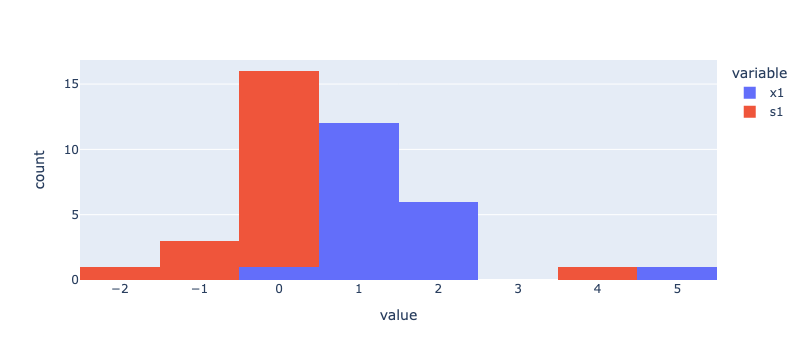

In [40]:
fig.add_histogram(x=standardized.s1,name="s1")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Hl3{d8Vd1N{)P}/PayDc">fig</variable></variables><block type="varDoMethod" id="6R@pUb;xtTQh,^Yl{WLf" x="-192" y="176"><mutation items="2"></mutation><field name="VAR" id="Hl3{d8Vd1N{)P}/PayDc">fig</field><field name="MEMBER">add_histogram</field><data>fig:add_histogram</data><value name="ADD0"><block type="dummyOutputCodeBlock" id="0U9xxp8TwKR3DBE1%gg7"><field name="CODE">x=standardized.s1</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="Gx/-};#Hw(fB:Bhc7#t3"><field name="CODE">name="s1"</field></block></value></block></xml>

As you can see, the standardized variable is now centered on zero (i.e. shifted left) and had been "squeezed" slightly, but has the same essential shape.
It's important to recognize that **standardization does not remove outliers!**

### Non-normality

Non-normality is not necessarily a problem for many models.
However, some models, like linear regression, try to minimize sum squared error, and if the response variable (the thing you are trying to predict) is not normal-ish, it's unlikely that the residuals will be well behaved (i.e. symmetrically distributed around zero, as we saw in diagnostic plots).

Let's load up some data to transform into a dataframe:

- Set `dataframe` to with `pd` do `read_csv` using
    - `"datasets/baseball.csv"`

In [42]:
dataframe = pd.read_csv('datasets/baseball.csv')

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable><variable id="Nzt=g[pEt(%l}kD/){CM">pd</variable></variables><block type="variables_set" id="`?6KbBU]0P;dk9!]~IoS" x="74" y="218"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><value name="VALUE"><block type="varDoMethod" id="4f!(OO{0q;5C0pvY6`_`"><mutation items="1"></mutation><field name="VAR" id="Nzt=g[pEt(%l}kD/){CM">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="ADD0"><block type="text" id=";~5r|uS~)G.`MPuZ.CnP"><field name="TEXT">datasets/baseball.csv</field></block></value></block></value></block></xml>

`CRuns` is career runs, and is highly skewed:

- with `px` do `histogram` using
    - `dataframe[` `"CRuns"` `]`

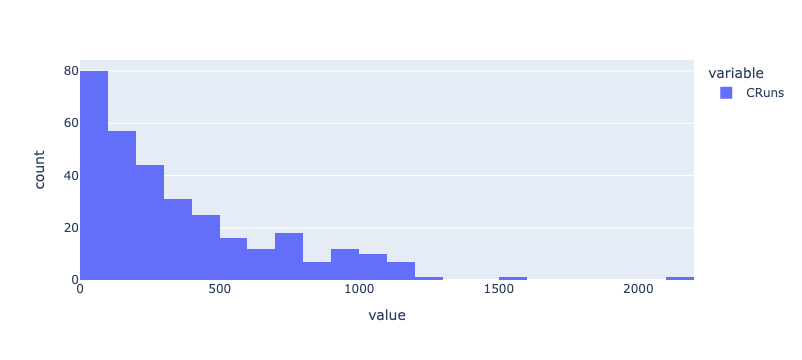

In [44]:
px.histogram(dataframe['CRuns'])

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="zZmWV$gHDceKnNTL0qJD">px</variable><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable></variables><block type="varDoMethod" id=";3XBa2S8*(1iI?altE[v" x="-115" y="207"><mutation items="1"></mutation><field name="VAR" id="zZmWV$gHDceKnNTL0qJD">px</field><field name="MEMBER">histogram</field><data>px:histogram</data><value name="ADD0"><block type="indexer" id="ZQGGecy}9v^qC^zH#438"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><value name="INDEX"><block type="text" id=":5!?d_2r8:.l]OVh|M|M"><field name="TEXT">CRuns</field></block></value></block></value></block></xml>

To transform the variable, we need to import `numpy`:

- `import numpy as np`

In [47]:
import numpy as np

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="]r.MVxn$.B;84`lPo@#0">np</variable></variables><block type="importAs" id="405[o%Y^^u?jrH7uGE3H" x="50" y="96"><field name="libraryName">numpy</field><field name="VAR" id="]r.MVxn$.B;84`lPo@#0">np</field></block></xml>

To plot log transformed `CRuns`:

- with `px` do `histogram` using
    - freestyle `np.log1p(dataframe["CRuns"])`
    
<!-- NOTE: freestyle is necessary here because intellisense reports log1p as a property, so we can't supply an argument with v1 intelliblocks -->

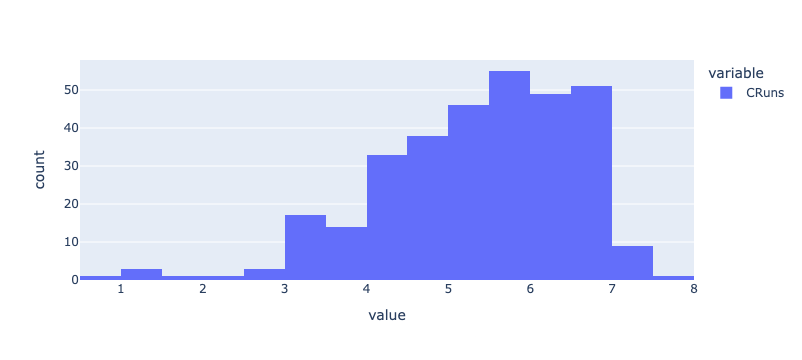

In [49]:
px.histogram(np.log1p(dataframe["CRuns"]))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="zZmWV$gHDceKnNTL0qJD">px</variable></variables><block type="varDoMethod" id=";3XBa2S8*(1iI?altE[v" x="-115" y="207"><mutation items="1"></mutation><field name="VAR" id="zZmWV$gHDceKnNTL0qJD">px</field><field name="MEMBER">histogram</field><data>px:histogram</data><value name="ADD0"><block type="dummyOutputCodeBlock" id="v2~j@?227+GX^/(Du7(P"><field name="CODE">np.log1p(dataframe["CRuns"])</field></block></value></block></xml>

In this case, a log transform improved the shape of the distribution a lot. 
Another common transform is the square root, which tends to be a bit less powerful.
In general:

- If the distribution has a tail to the right (right skewed) use a root-type transformation (or log)
- If the distribution has a tail to the left (left skewed) use a power transformation



## Create new variables

Often we need to create a new variable to answer a specific question.
Let's look at an example from the `tips` dataset.
This dataset is built into `plotly`, so to access it, do this:

- Set `dataframe` to freestyle `px.data.tips()`
- `dataframe`

In [51]:
dataframe = px.data.tips()

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable></variables><block type="variables_set" id="4@5zw:c510icc@f5gj0h" x="-145" y="54"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><value name="VALUE"><block type="dummyOutputCodeBlock" id="4fAGcx?Ksz+QMQ7u0)]."><field name="CODE">px.data.tips()</field></block></value></block><block type="variables_get" id="Ub0w4?_NjBM~szj,NjrF" x="-152" y="109"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field></block></xml>

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


As you can see, the `tips` dataset contains 7 variables involved with restaurant tipping:

- `total_bill`: the total bill amount
- `tip`: the tip amount
- `sex`: the sex of the waiter
- `smoker`: the smoking status of the customer
- `day`: the day of the week
- `time`: the time of day
- `size`: the size of the the customer party 

We'd like to see if there is a difference between how much men and women tip.

But we have a problem: "how much" isn't just the `tip` amount - it should depend on the total amount too.

One way to resolve this is to divide `tip` by `total_bill` to get a tip percentage, e.g. 20%.
To do this, we use the `assign` function to create a new column called `ratio` that we've calculated this way:

- Set `dataframe` to with `dataframe` do `assign` using
    - freestyle `ratio=` followed by `dataframe["tip"]` &divide; `dataframe["total_bill"]`

In [53]:
dataframe = dataframe.assign(ratio= (dataframe['tip'] / dataframe['total_bill']))

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable></variables><block type="variables_set" id="o1ct$+ge.@t#IWxzqDuf" x="-177" y="104"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><value name="VALUE"><block type="varDoMethod" id="{60QkieNtlIe!8pofv*j"><mutation items="1"></mutation><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><field name="MEMBER">assign</field><data>dataframe:assign</data><value name="ADD0"><block type="valueOutputCodeBlock" id="X/E.e+WlpSIe/yc:L^Bx"><field name="CODE">ratio=</field><value name="INPUT"><block type="math_arithmetic" id="(@KKNt8RN{99pjjzOzhf"><field name="OP">DIVIDE</field><value name="A"><shadow type="math_number" id="WZW,S?V3a!yHpWw}3wgh"><field name="NUM">1</field></shadow><block type="indexer" id="U,rmi6B;8.sp]Wp]-cDs"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><value name="INDEX"><block type="text" id="+CzdXBJrqJ_kB;uryeTt"><field name="TEXT">tip</field></block></value></block></value><value name="B"><shadow type="math_number" id="p3:TTG6s0VGd$!+33Tt%"><field name="NUM">1</field></shadow><block type="indexer" id="^?_42r/5u_]V)l!tEXi^"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field><value name="INDEX"><block type="text" id="ODv=7HD#(EacB]av0dbv"><field name="TEXT">total_bill</field></block></value></block></value></block></value></block></value></block></value></block><block type="variables_get" id="(6Afq^C~smg)Yqm.BpSu" x="-192" y="296"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field></block></xml>

,total_bill,tip,sex,smoker,day,time,size,ratio
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


One way to proceed would be to see if there was a statistically significant difference between `ratio` for men and women, e.g. by using an independent samples t-test, but let's just plot to check if we can see a difference:

- with `px` do `histogram` using
    - `dataframe` 
    - freestyle `x="ratio"`
    - freestyle `color="sex"`

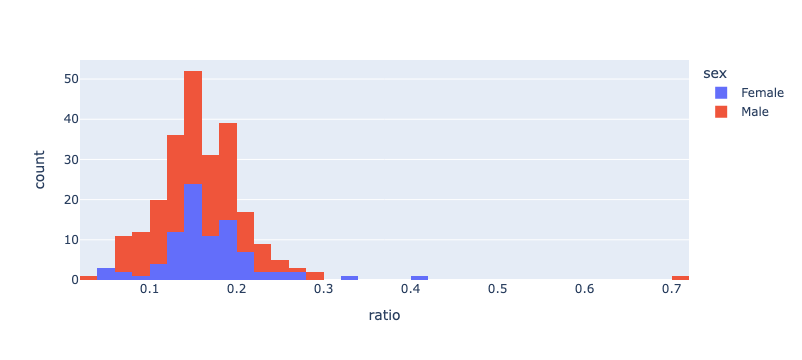

In [55]:
px.histogram(dataframe,x="ratio",color="sex")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="zZmWV$gHDceKnNTL0qJD">px</variable><variable id="/z]X|sEpLfH7ip{3^4{[">dataframe</variable></variables><block type="varDoMethod" id=";3XBa2S8*(1iI?altE[v" x="-115" y="207"><mutation items="3"></mutation><field name="VAR" id="zZmWV$gHDceKnNTL0qJD">px</field><field name="MEMBER">histogram</field><data>px:histogram</data><value name="ADD0"><block type="variables_get" id="BwJzSVtxVG};cH=9|/.*"><field name="VAR" id="/z]X|sEpLfH7ip{3^4{[">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock" id="~BA1[^jmdq+qzIO-z`s1"><field name="CODE">x="ratio"</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock" id="}Ma;X*[#_wZ4ZP0pjT!w"><field name="CODE">color="sex"</field></block></value></block></xml>

Is there a difference? 
Visually, no, there isn't - the distributions for men and women are centered on the same tip ratio and have the same shape.
Remember that the y-axis is count, so differences in height only show how many men vs. women were present in the data, not how they tipped.

It's pretty common to create variables to answer your data science questions!

## Versioning

Versioning is a separate topic from data cleaning, but it is also closely related.

As you've probably already figured out, how you clean/preprocess your data can have profound implications for your later modeling work.

Therefore it is very important to transparently document each step of cleaning/preprocessing.

One way to do this is with a Jupyter notebook, like we've been doing, but another way is to incrementally save different versions of your work.
This is helpful if you want to try out one approach without "junking up" your existing notebook.

The standard for version control in modern software engineering is something called `git`, which is British slang for an unpleasant person.
`git` allows you to save **snapshots** of your work that you can restore at any point. 
It also allows you to create different versions of your workspace, so you can try different things out, using something called **branches**.

`git` can be used in several different ways.
The most advanced way, which you will often see described online, is from the terminal.
In Juptyer, we can access the terminal from the Launcher or File->New.
Here is an example command `git status`, from the terminal:

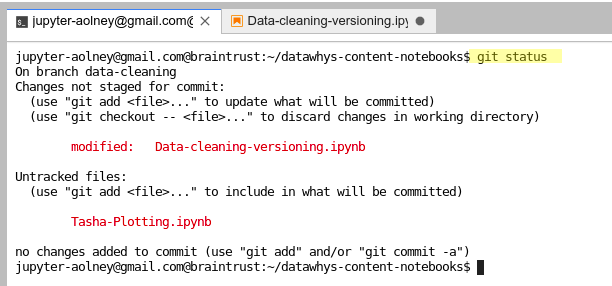

If you find this cryptic, you're not alone.
There are [many tutorials](https://www.atlassian.com/git/tutorials) available for using `git` this way.

Fortunately, there are ways to integrate `git` with Jupyter's web interface.
Look on the left hand side for this `git` icon, and press it:

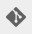

The pop out menu shows what `git` knows about your working folder and files, and it allows you to save a snapshot with a **commit**:

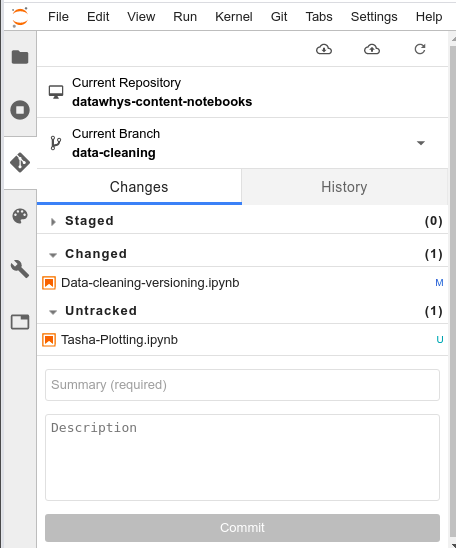

A commit will save a snapshot of all changes that have been *staged*.

`git` will keep track of any file that you previously committed, so if you've changed that file, it will show in *changed*.

Any file that exists but is not being tracked appears in *untracked*.

You can move a file between these categories by pressing the +/- button that appears when you mouse over them:

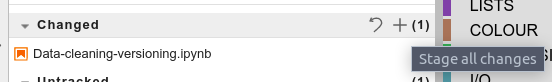

Once you are ready to commit, you type a little message describing what you're saving and then press the commit button.

To see your previous snapshots, press the *History* tab:

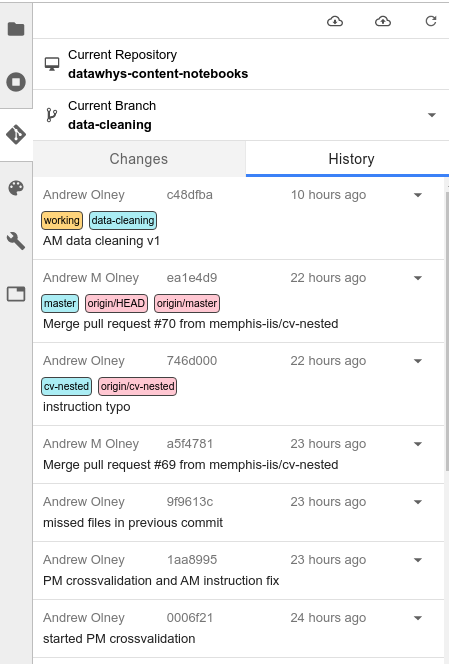

### Summing up

Versioning is very powerful and useful for trying things out and undoing mistakes.
`git` gives you sophisticated tools for doing this, and is a good alternative to making lots of copies of the same notebook that are just slightly different from each other.

<!--  -->